
***
# Tadawul Dataset Preprocessing

***


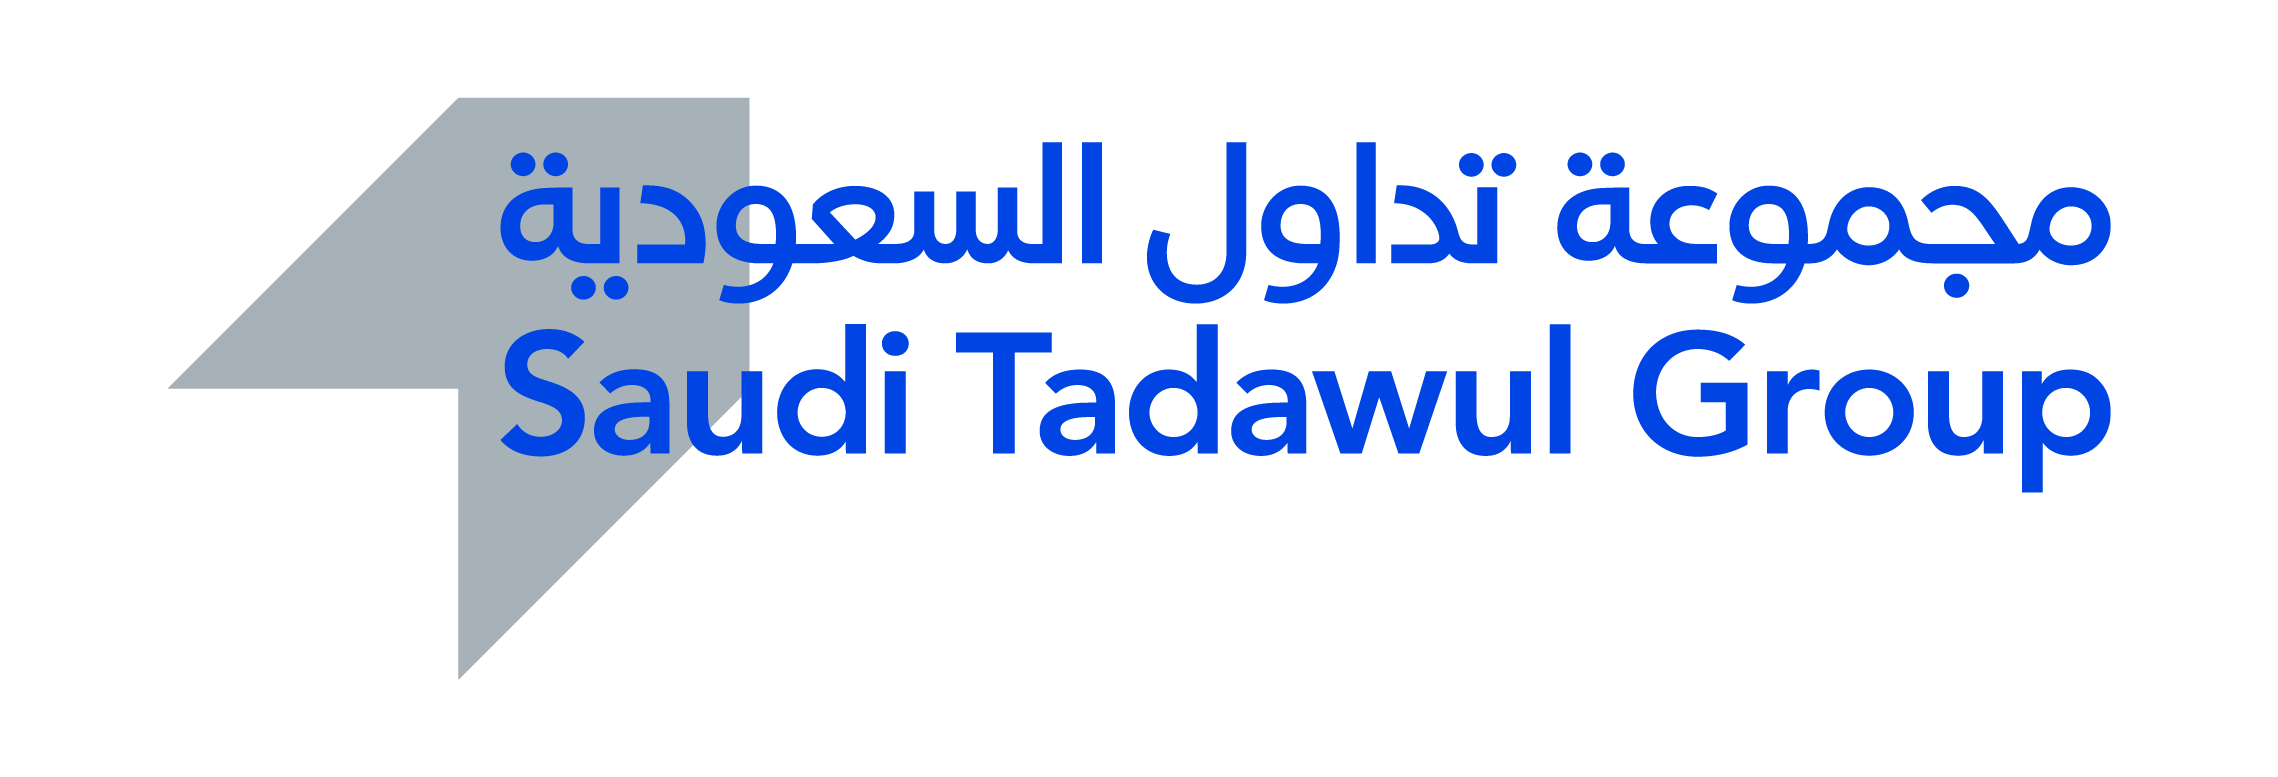

In [16]:
Image("Tadawul_Logo.png")

***
# Preprocessing Steps:
#### 1. Drop NAN values
#### 2. Split the Date column
#### 3. Change the Date column datatype
#### 4. Delete 2001 year data
***

## Importing Packages 

In [1]:
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Image

## Loading Dataset 

In [2]:
df = pd.read_csv('Tadawul_stocks.csv')

In [3]:
df.head(3)

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/5/2020,35.55,35.85,34.9,34.90,-0.40,-1.13,436609,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/4/2020,34.70,35.65,34.5,35.30,0.25,0.71,737624,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/3/2020,34.70,35.15,34.7,35.05,1.05,3.09,489831,17116413.40,854.0


In [4]:
# Dataset Dimentions
df.shape

(593819, 14)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   symbol          593819 non-null  int64  
 1   name            593819 non-null  object 
 2   trading_name    593819 non-null  object 
 3   sectoer         593819 non-null  object 
 4   date            593819 non-null  object 
 5   open            587364 non-null  float64
 6   high            587122 non-null  float64
 7   low             587122 non-null  float64
 8   close           593819 non-null  float64
 9   change          593819 non-null  float64
 10  perc_Change     593819 non-null  float64
 11  volume_traded   593819 non-null  int64  
 12  value_traded    593819 non-null  float64
 13  no_trades       586128 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 63.4+ MB


In [6]:
# Number of unique values in all the categorical columns
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'name': 199, 'trading_name ': 199, 'sectoer': 11, 'date': 4789}

#### 1. Drop NAN values

In [7]:
# Check the number of missing values
df.isnull().sum()

symbol               0
name                 0
trading_name         0
sectoer              0
date                 0
open              6455
high              6697
low               6697
close                0
change               0
perc_Change          0
volume_traded        0
value_traded         0
no_trades         7691
dtype: int64

In [8]:
# Check the percentage of missing values
df.isna().mean()

symbol            0.000000
name              0.000000
trading_name      0.000000
sectoer           0.000000
date              0.000000
open              0.010870
high              0.011278
low               0.011278
close             0.000000
change            0.000000
perc_Change       0.000000
volume_traded     0.000000
value_traded      0.000000
no_trades         0.012952
dtype: float64

In [9]:
# Dataset Dimentions before dropping the missing values
df.shape

(593819, 14)

In [3]:
# Drop the missing values
df.dropna(subset=['open', 'high', 'low', 'no_trades'], inplace=True)

In [11]:
# Check the number of missing values after dropping
df.isnull().sum()

symbol            0
name              0
trading_name      0
sectoer           0
date              0
open              0
high              0
low               0
close             0
change            0
perc_Change       0
volume_traded     0
value_traded      0
no_trades         0
dtype: int64

In [4]:
# Dataset Dimentions after dropping the missing values
df.shape

(579431, 14)

#### 2. Split the Date column

In [4]:
# Create 3 columns and split by the slash
df[["month", "day", "year"]] = df["date"].str.split("/", expand = True)

In [13]:
df.head(3)

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,month,day,year
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/5/2020,35.55,35.85,34.9,34.90,-0.40,-1.13,436609,15399073.50,804.0,3,5,2020
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/4/2020,34.70,35.65,34.5,35.30,0.25,0.71,737624,25981391.35,1268.0,3,4,2020
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/3/2020,34.70,35.15,34.7,35.05,1.05,3.09,489831,17116413.40,854.0,3,3,2020


#### 3. Change the Date column datatype

In [5]:
# Change the column type to filter the data
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y')

#### 4. Delete 2001 year data

In [6]:
# 2001 data is only for 1 day (31 Dec)--> 47 records (we don't need it)
df = df[(df['date'].dt.year != 2001)]

In [8]:
df.head(3)

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,month,day,year
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.9,34.90,-0.40,-1.13,436609,15399073.50,804.0,3,5,2020
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.5,35.30,0.25,0.71,737624,25981391.35,1268.0,3,4,2020
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.7,35.05,1.05,3.09,489831,17116413.40,854.0,3,3,2020


In [7]:
df.shape

(579384, 17)

## Save the clean dataset

In [9]:
df.to_csv('Tadawul_stocks_Prepro.csv', index=False)